## I denna kodcell placeras modulimporter och egendefinerade funktioner som används i flera deluppgifter

In [ ]:
import csv
import matplotlib.pyplot as plt


# Functions for assignment 1:
# Function to read in a csv-file and return its data as a list
def read_file(fileName):
    data = []
    
    with open(fileName, "r") as f_r: # Opens the file sent through the parameter
        csv_reader = csv.reader(f_r, delimiter = ";")
        next(csv_reader, None) # Skips the header row (so I can convert year to int)
        
        # Fills data with each row from the read file
        for row in csv_reader:
            data.append(row)
    return data

#------------------------------------------------------------------------------------------------------------------

# Functions for assignment 2:
# Function to get the year and area input from the user
def extract_data(year, area, data):
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
              "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    
    # Empty lists to hold data
    fast_pris_1 = []
    fast_pris_3 = [] # assignment 4
    rorligt_pris = []
    
    # For each row in the csv file (data table)
    for row in data:
        # Check if the year of that row matches the user input
        if row[0] == str(year): # if true, append the values to the correct lists
            fast_pris_1.append(float(row[(area * 3) - 1]))
            fast_pris_3.append(float(row[(area * 3)]))
            rorligt_pris.append(float(row[(area * 3) + 1]))
            
    # Return the filled lists
    return months, fast_pris_1, fast_pris_3, rorligt_pris

    
# Function to plot datapoints on graph
def plot_combined_data(months, fast_pris_1_lgh, rorligt_pris_lgh, fast_pris_1_villa, rorligt_pris_villa, year):
    plt.figure(figsize = (10,10))
    
    # Rörligt
    plt.plot(months, rorligt_pris_lgh, label = "Rörligt - lgh", color = "blue")
    plt.plot(months, rorligt_pris_villa, label = "Rörligt - villa", color = "orange")
    
    # Fast 1 år
    plt.plot(months, fast_pris_1_lgh, label = "Fast 1 år - lgh", color = "green")
    plt.plot(months, fast_pris_1_villa, label = "Fast 1 år - villa", color = "red")
    
    plt.xticks(range(len(months)), months, rotation = 45)
    plt.title(f"Elpris variation för år {year}")
    plt.xlabel("Månad")
    plt.ylabel("Pris (öre/kWh)")
    plt.legend()
    plt.grid(True)
    plt.show()

#------------------------------------------------------------------------------------------------------------------

# Functions for assignment 3:
# Function to calculate the stats from the csv file (min, max, average, median)
def calculate_stats(prices, months):
    max_price = float("-inf") # Really small number
    min_price = float("inf") # Really big number
    max_month = ""
    min_month = ""
    total = 0
    avg_price = 0
    sorted_prices = sorted(prices) # Sorts the prices into a list in acending order

    
    for i, price in enumerate(prices):
        if price < min_price:
            min_price = price # Set price as min_price
            min_month = months[i]
        if price > max_price:
            max_price = price # Set price as max_price
            max_month = months[i]
        
        total += price

    avg_price = total / len(prices) # Calculate average based on data

    # Find the middle index by dividing prices size by 2 (only allowing whole numbers)
    mid_index = len(prices) // 2
    if len(prices) % 2 == 0: # Checks if the list size is even
        median = (sorted_prices[mid_index - 1] + sorted_prices[mid_index]) / 2 # If the list is uneven, get the average value of those 2 values
    else:
        median = sorted_prices[mid_index]
    
    # Return all the calculated stats
    return min_price, min_month, max_price, max_month, avg_price, median

# Function to display the results as a table
def display_results(year, customer_type, stats):
    header = f"Analys av elpriserna för kategorin {'lägenhetskund' if customer_type == 'L' else 'villakund'} år {year}" # Sets the header that will be used
    
    # Styling the table to look correct according to assingment images
    print("")
    print("=" * 110)
    print("")
    print("")
    print(header.center(100))
    print("")
    print("")
    print("\t\t  rörligt pris (öre/kWh) \t\t\t\t\tfast pris 3 år (öre/kWh)")
    print("Prisomr.  min -- (mån)\tmax -- (mån)\tmedel\tmedian \t\tmin -- (mån)\tmax -- (mån)\tmedel\tmedian")
    print("-" * 110)
    
    areas = ["SE1", "SE2", "SE3", "SE4"]
    
    # This loop goes through each area (SE1, SE2, etc)
    for i, area in enumerate(areas):
        rp = stats[i][0]  # Rörligt pris
        fp = stats[i][1]  # Fast pris
        
        # Displays the data results in the table in the correct structure
        print(f"{area}\t{rp[0]:.2f} \t{rp[1][:3]}\t{rp[2]:.2f} \t{rp[3][:3]}\t{rp[4]:.2f}\t{rp[5]:.2f}\t\t{fp[0]:.2f} \t{fp[1][:3]}\t{fp[2]:.2f} \t{fp[3][:3]}\t{fp[4]:.2f}\t{fp[5]:.2f}")
        
    print("=" * 110)


# Function to draw bar-graphs
def plot_results(stats):
    
    # Same colors as the ones used in the assingment instructions
    blue = "#0079B9"
    orange = "#FF7500"
    green = "#00A200"
    red = "#E90016"
    
    areas = ["SE1", "SE2", "SE3", "SE4"] # Creating the headers for the x-axis 
    rorligt_labels = ["rörligt - min", "rörligt - max", "rörligt - medel", "rörligt - median"]
    fast_labels = ["fast 3 år - min", "fast 3 år - max", "fast 3 år - medel", " fast 3 år - median"]
    colors = [blue, orange, green, red] # Setting the colors

    # Extracting stats (min, max, average, median) for rorligt_pris and fast_pris, doing 1 area at a time
    # Either list will have four sublists (one for each area) where each sublist has four values (min, max, average, median).
    rorligt_all = [[stats[i][0][0], stats[i][0][2], stats[i][0][4], stats[i][0][5]] for i in range(len(areas))]
    fast_all = [[stats[i][1][0], stats[i][1][2], stats[i][1][4], stats[i][1][5]] for i in range(len(areas))]

    bar_width = 0.15
    index = range(len(areas))

    # Creating the graph-bars for Rörligt Pris for all areas
    plt.figure(figsize = (10, 10))
    for i, (label, color) in enumerate(zip(rorligt_labels, colors)):
        plt.bar([x + i * bar_width for x in index], [data[i] for data in rorligt_all], width = bar_width, label = label, color = color)

    # Designing the graph
    plt.xlabel("Prisområden", fontsize = 14)
    plt.ylabel("pris (öre/kWh)", fontsize = 14)
    plt.title(f"Elpriser Rörligt Pris för Alla Områden", fontsize = 18)
    plt.xticks([x + 1.5 * bar_width for x in index], areas, fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.legend(loc = "upper left") # Positioning the bar-details box
    plt.tight_layout()
    plt.grid(True)
    plt.show()

    # Creating the graph-bars for Fast Pris 3 år for all areas
    plt.figure(figsize = (10, 10))
    for i, (label, color) in enumerate(zip(fast_labels, colors)):
        plt.bar([x + i * bar_width for x in index], [data[i] for data in fast_all], width = bar_width, label = label, color = color)

    plt.xlabel("Prisområden", fontsize = 14)
    plt.ylabel("pris (öre/kWh)", fontsize = 14)
    plt.title(f"Elpriser Fast Pris 3 år för Alla Områden", fontsize = 18)
    plt.xticks([x + 1.5 * bar_width for x in index], areas, fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.legend(loc = "upper left")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

#------------------------------------------------------------------------------------------------------------------

# Functions for assignment 4:

# Function to get the price from december of the previous year so that I can get the change_factor for January
# of the users chosen year.
def get_previous_dec(year, area, data, price_agreement):
    dec_price = None

    for row in data:
        if row[0] == str(int(year) - 1) and row[1].lower() == "december": # Checks that the year is the previous 
                                                                          # year and the month is December
            # Gets the correct price agreement
            if price_agreement == "F1":
                dec_price = float(row[(area * 3) - 1])
            elif price_agreement == "F3":
                dec_price = float(row[area * 3])
            elif price_agreement == "R":
                dec_price = float(row[(area * 3) + 1])
            break
            
    return dec_price


# Function to calculate the price change across the months 
def calculate_change_factors(prices):
    change_factors = []
    
    # This loops through the list of prices starting from the second element
    for i in range(1, len(prices)):
        previous_price = prices[i - 1]
        current_price = prices[i]
        if previous_price:  # Checks that there actually is a previous price 
            change_factor = ((current_price - previous_price) / previous_price) * 100
            change_factors.append(change_factor)
        else:
            change_factors.append(None)  # For January or if previous December data is not available
    return change_factors

# Function to create the diagram according to the assignment
def plot_change_factors(months, change_factors, customer_type, area, year):
    
    # To help with the title of the diagram
    if customer_type == "L":
        customer_type_str = "lägenhetskund"
    elif customer_type == "V":
        customer_type_str = "villakund"
    
    plt.figure(figsize = (13, 9))
    plt.bar(months, change_factors, color = "red", width = 0.3) # I tried to get as close as i could to the image
    
    plt.xlabel("Månad")
    plt.ylabel("Förändring [%]")
    plt.title(f"Månatlig förändring av elpriset för {customer_type_str} i prisområde SE{area} år {year}")
    plt.xticks(range(len(months)), months)
    plt.grid(True)
    plt.show()

#------------------------------------------------------------------------------------------------------------------

# Functions for assignment 5:

def calc_price_for_agreement(data, price_agreement):
    
    # I created 2 dictionaries to hold this data
    calculated_prices = {"SE1": [], "SE2": [], "SE3": [], "SE4": []} # SE[area] is the key, the value is the lists which contain the prices
    price_details = {"SE1": [], "SE2": [], "SE3": [], "SE4": []}
    
    for row in data:
        year = int(row[0])
        if 2018 <= year <= 2023: # Makes sure to get the data between 2018-2023
            for area in range(1, 5):  # For each price area (SE1-SE4).
                if price_agreement == "F1":
                    price = float(row[(area * 3) - 1])
                elif price_agreement == "F3":
                    price = float(row[area * 3])
                elif price_agreement == "R":
                    price = float(row[(area * 3) + 1])
                    
                calculated_prices[f"SE{area}"].append(price) # Setting the correct prices at the correct area (key)
                price_details[f"SE{area}"].append((year, row[1][:3], price)) # Storing the year, month (only the first 3 letters), and price.

    return calculated_prices, price_details

# This function calculates the stats needed to make the table and diagrams
def calculate_stats_A5(prices, details):
    min_price = min(prices)
    max_price = max(prices)
    avg_price = sum(prices) / len(prices)

    # Find the details of the min and max prices
    min_index = prices.index(min_price) # sets the index of where the min price is located
    max_index = prices.index(max_price)
    
    min_year = details[min_index][0] # index 0 is the years being passed from the details from calc_price_for_agreement()
    min_month = details[min_index][1] # index 1 is the months
    
    max_year = details[max_index][0]
    max_month = details[max_index][1]

    return min_price, min_month, min_year, max_price, max_month, max_year, avg_price

# This function builds the table for assignment 5
def create_table(apartment_stats, villa_stats, agreement_name):
    title = f"\t\tLägsta-, högsta- och medelvärden av elpriserna \n\t\tunder tidsperioden 2018-2023 för {agreement_name} avtal."
    header = "Prisomr.\tlägsta\tår\tmån\thögsta\tår\tmån\t\tmedel"
    
    print()
    print("=" * 82)
    print()
    print()
    print(title)
    print()
    print()
    print(header)
    print("-" * 82)

    # Print apartment stats
    print("Kategori lägenhetskund:")
    for area, stats in apartment_stats.items():
        min_price, min_month, min_year, max_price, max_month, max_year, avg_price = stats
        print(f"{area}\t\t{min_price}\t{min_year}\t{min_month}\t{max_price}\t{max_year}\t{max_month}\t\t{str(round(avg_price, 2))}")

    print("-" * 82)
    
    # Print villa stats
    print("Kategori villakund:")
    for area, stats in villa_stats.items():
        min_price, min_month, min_year, max_price, max_month, max_year, avg_price = stats
        print(f"{area}\t\t{min_price}\t{min_year}\t{min_month}\t{max_price}\t{max_year}\t{max_month}\t\t{str(round(avg_price, 2))}")
    print("=" * 82)

# This function creates the plot diagram
def create_plots(stats, customer_type, agreement_name):
    plt.figure(figsize = (6, 5))
    areas = ["SE1", "SE2", "SE3", "SE4"]
    
    # Same colors as the ones used in the assingment instructions
    blue = "#0079B9"
    orange = "#FF7500"
    green = "#00A200"
    
    x_positions = range(len(areas))  # The number of x-positions on the x-axis (for the 4 areas)

    # Creating empty lists to hold the min, max, and average prices.
    min_prices = []
    max_prices = []
    avg_prices = []

    # Loops over the areas and gets the correct statistics from the stats dictionary.
    for area in areas:
        # Appends the min, max and average price for the current area to the min_prices list.
        min_prices.append(stats[area][0])
        max_prices.append(stats[area][3])
        avg_prices.append(stats[area][6])

    plt.scatter(x_positions, min_prices, color = blue, label = "lägsta elpris.")
    plt.scatter(x_positions, max_prices, color = orange, label = "högsta elpris.")
    plt.scatter(x_positions, avg_prices, color = green, label = "medelvärde.")

    plt.title(f"Elpriser\n Lägsta-, högsta och medelvärde under 2018-2023.\n Kategori {customer_type} - {agreement_name} avtal.")
    plt.xlabel("Prisområden")
    plt.ylabel("Pris (öre/kWh)")
    plt.xticks(ticks = x_positions, labels = areas)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Deluppgift 1
Ev. kommentar:

In [4]:
# b) Anropar funktionen read_file för att läsa in data från de två csv-filerna
lghData = read_file("lghpriser.csv")
villaData = read_file("villapriser.csv")

# Skriver ut de tre första raderna från varje lista för att verifiera innehållet
print(lghData[:3])
print(villaData[:3])

[['2018', 'januari', '64.12', '63.98', '67.81', '63.87', '63.76', '67.92', '64.95', '65.31', '68.28', '66.07', '66.34', '69.38'], ['2018', 'februari', '66.01', '64.29', '77.14', '65.82', '63.96', '77.42', '67.04', '65.54', '77.96', '68.02', '66.58', '78.91'], ['2018', 'mars', '68.82', '65.82', '85.04', '68.53', '65.47', '85.81', '69.65', '66.93', '85.92', '70.85', '68.14', '86.18']]
[['2018', 'januari', '49.39', '48.71', '50.4', '49.4', '48.7', '50.59', '50.49', '50.17', '50.81', '51.82', '51.17', '51.81'], ['2018', 'februari', '51.23', '48.99', '60.75', '51.33', '48.84', '60.91', '52.55', '50.34', '61.24', '53.74', '51.33', '62.32'], ['2018', 'mars', '54.14', '50.56', '68.39', '54.15', '50.38', '69', '55.26', '51.78', '68.81', '56.73', '52.93', '69.13']]


In [ ]:
## Deluppgift 2

Ange prisområde (1-4): 4
Ange årtalet som ska presenteras (2018-2023): 2019


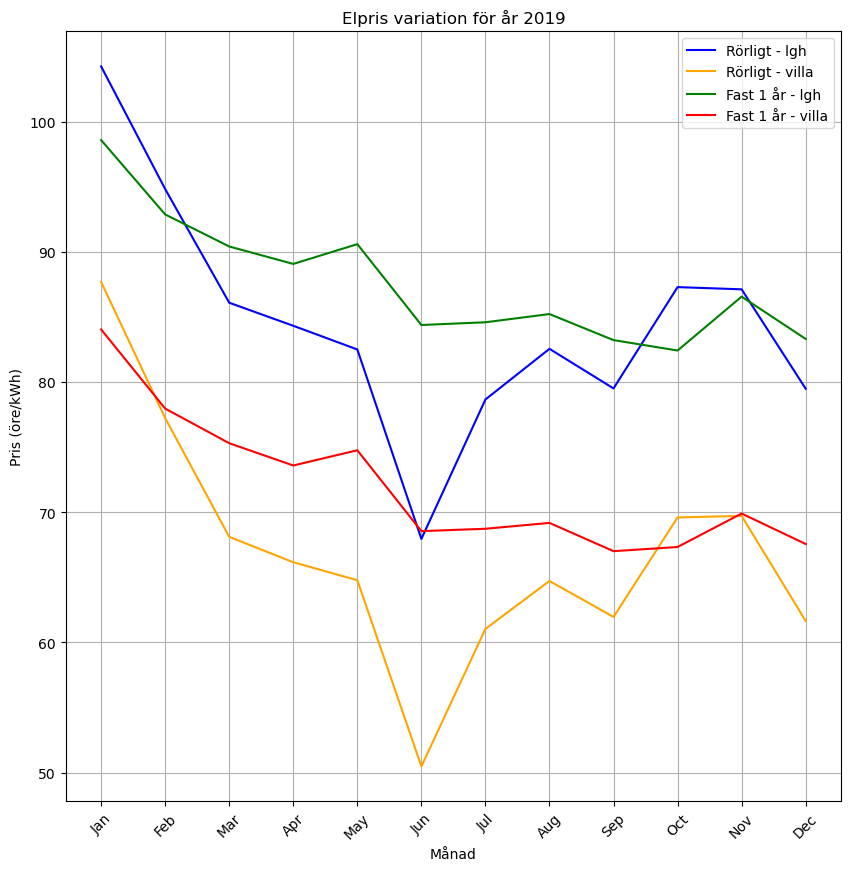

In [5]:
prisomrade = int(input("Ange prisområde (1-4): "))

while prisomrade not in [1,2,3,4]:
    prisomrade = int(input("Felaktigt prisområde. Ange prisområde (1-4): "))

year = int(input("Ange årtalet som ska presenteras (2018-2023): "))
while year not in range(2018, 2024):
    year = int(input("Felaktigt år. Ange årtalet som ska presenteras (2018-2023): "))

# Depending on the user's choice, read from the correct file
# Apartment
data_lgh = read_file("lghpriser.csv")
months, fast_pris_1_lgh, fast_pris_3_lgh, rorligt_pris_lgh = extract_data(year, prisomrade, data_lgh) # I had to add fast_pris_3 to avoid a mismatch as I am using the same function for assignment 4.

# Villa
data_villa = read_file("villapriser.csv")
months, fast_pris_1_villa, fast_pris_3_villa, rorligt_pris_villa = extract_data(year, prisomrade, data_villa)

# Plot the combined data for both apartments and villas
plot_combined_data(months, fast_pris_1_lgh, rorligt_pris_lgh, fast_pris_1_villa, rorligt_pris_villa, year)

## Deluppgift 3
Ev. kommentar:

Lägenhetskund (L) eller villakund (V)?: v
Ange årtal som ska presenteras (2018-2023): 2020




                        Analys av elpriserna för kategorin villakund år 2020                        


		  rörligt pris (öre/kWh) 					fast pris 3 år (öre/kWh)
Prisomr.  min -- (mån)	max -- (mån)	medel	median 		min -- (mån)	max -- (mån)	medel	median
--------------------------------------------------------------------------------------------------------------
SE1	17.82 	apr	42.20 	jan	28.92	29.72		45.05 	dec	57.43 	jan	49.19	48.47
SE2	17.58 	apr	42.20 	jan	28.80	29.40		45.05 	dec	57.35 	jan	49.07	48.42
SE3	21.72 	jul	55.11 	aug	38.86	40.48		48.47 	aug	59.93 	jan	51.41	50.64
SE4	28.68 	maj	63.28 	sep	45.63	43.67		51.21 	aug	62.13 	jan	54.45	53.79


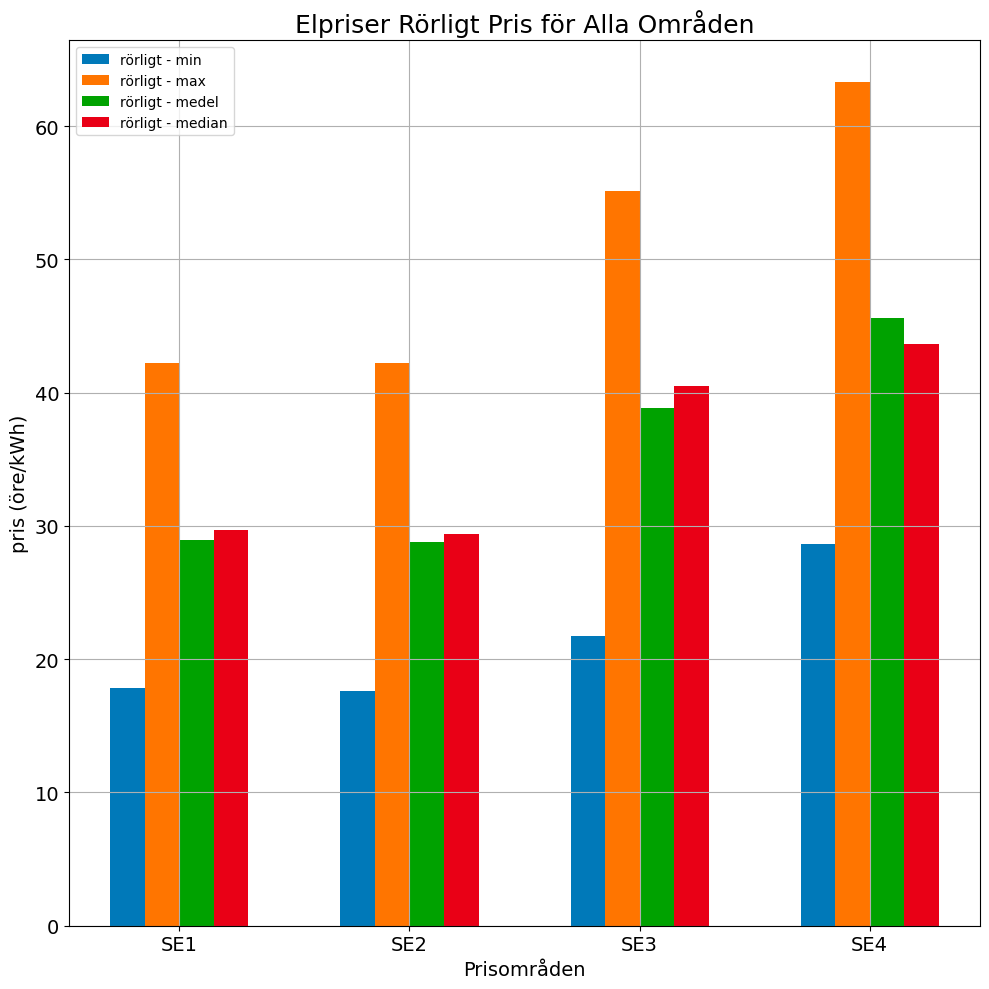

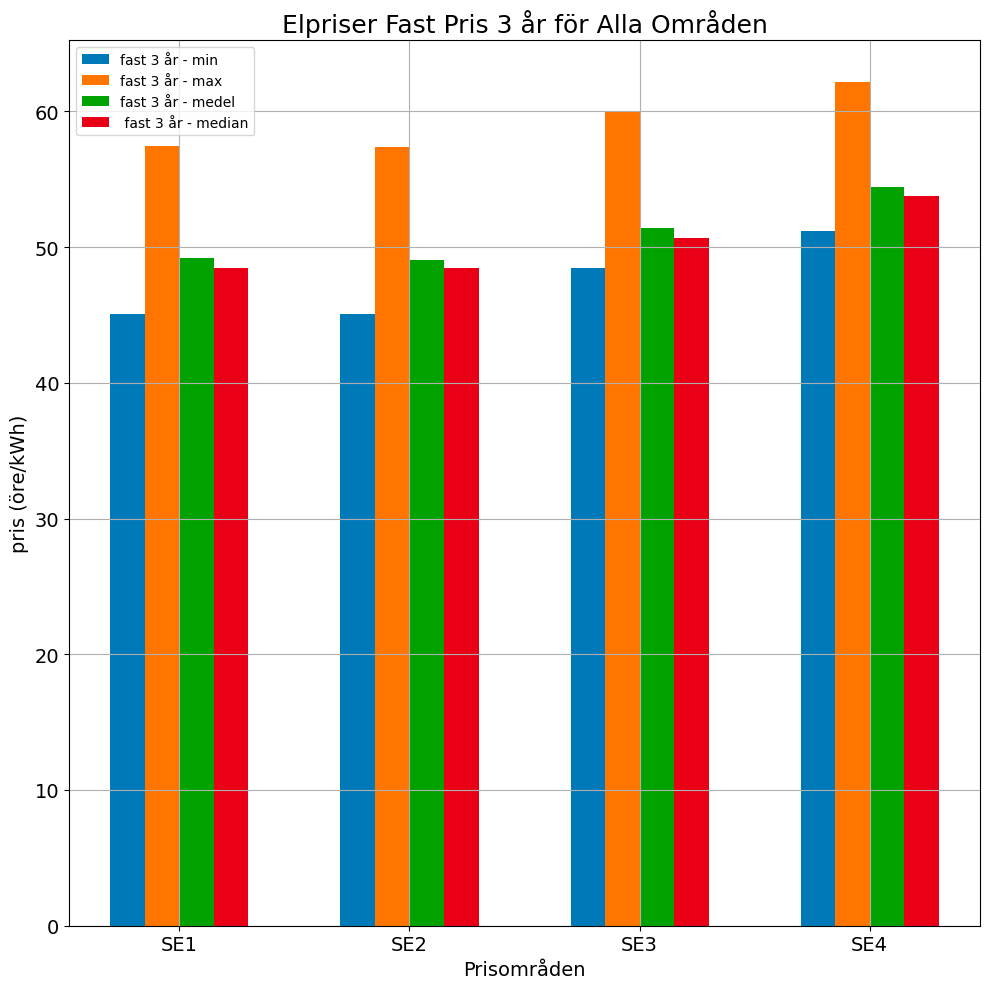

In [6]:
# Asks user if they want to continue as a apartment customer or house customer
customerType = input("Lägenhetskund (L) eller villakund (V)?: ").upper() # Sets the input to uppercase

# Checks if user input is valid or not, if not, the user gets the prompt again
while customerType not in ["L", "V"]:
    print("Fel input, försök igen: ")
    customerType = input("Lägenhetskund (L) eller villakund (V)?: ").upper()

# Asks user for year they want to specify their search to
year = int(input("Ange årtal som ska presenteras (2018-2023): "))
print("")
while year not in range(2018, 2024):
    print("Fel input, försök igen: ")
    year = int(input("Ange årtal som ska presenteras (2018-2023): "))
    print("")

# Sets file_name to either lghpriser.csv or villapriser.csv, depending on the users input for customerType
if customerType == "L":
    file_name = "lghpriser.csv"
else:
    file_name = "villapriser.csv"

# Uses the function read_file to open and read the chosen file
data = read_file(file_name)
stats = []

# Loops through specific SE areas to gather and compute data for the selected year
for i in range(1, 5):
    # Gets the months for the specified year
    months = [row[1] for row in data if row[0] == str(year)]
    
    # Gets the "Rörligt Pris" and "Fast Pris 3" for the specified year and SE area
    rorligt_prices = [float(row[(3 * i) +1]) for row in data if row[0] == str(year)]
    fast_prices = [float(row[3 * i]) for row in data if row[0] == str(year)]
    
    # Calculates statistics for "Rörligt Pris" and "Fast Pris 3" based on the gathered data
    rorligt_stats = calculate_stats(rorligt_prices, months)
    fast_stats = calculate_stats(fast_prices, months)

    # Appends the calculated stats to the "stats" list
    stats.append((rorligt_stats, fast_stats))

# Displays the calculated statistics in a table structre
display_results(year, customerType, stats)

# Calls func plot_results to draw graphs
plot_results(stats)

## Deluppgift 4
Ev. kommentar:

Lägenhetskund (L) eller villakund (V)? :l
Ange prisavtal (R, F1, F3): f3
Ange prisområde (1-4): 4
Ange önskat årtal (2018-2023): 2020


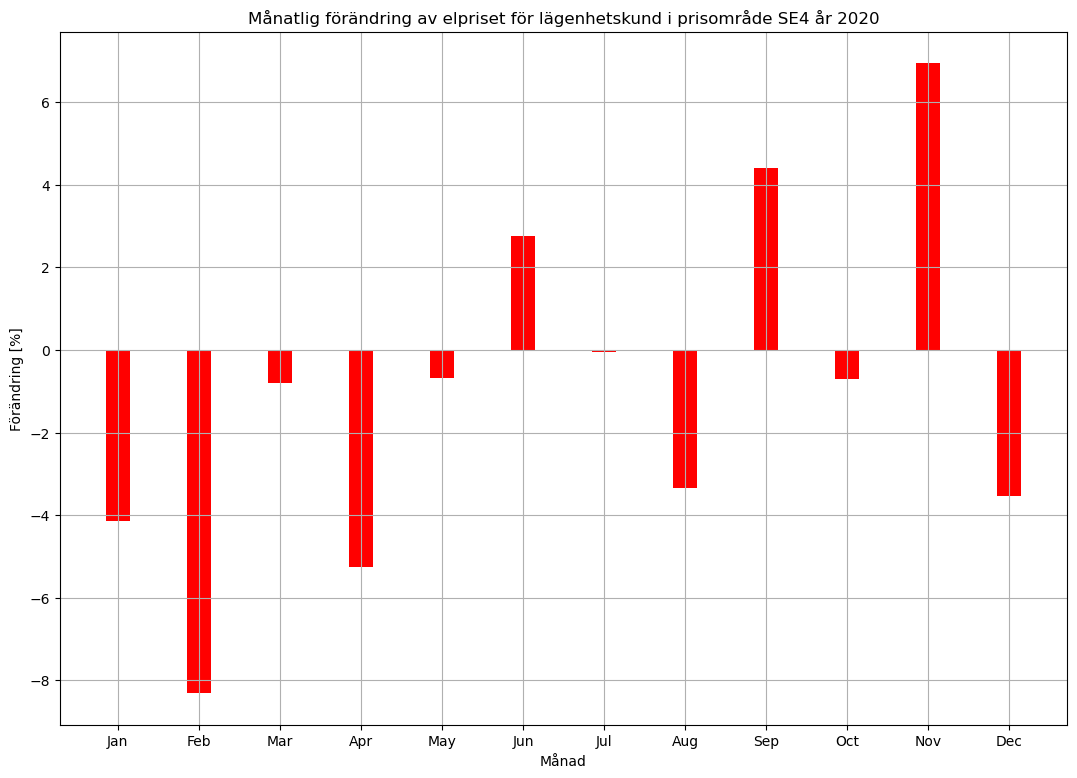

In [7]:
# User input
customer_type = input("Lägenhetskund (L) eller villakund (V)? :").upper()
price_agreement = input("Ange prisavtal (R, F1, F3): ").upper()
area = int(input("Ange prisområde (1-4): "))
year = input("Ange önskat årtal (2018-2023): ")

# Sets file_name based on the customer type
file_name = "lghpriser.csv" if customer_type == "L" else "villapriser.csv"

# Read the data from the file using the read_file function from assignment 1
data = read_file(file_name)

# Get the price for December of the previous year
dec_price = get_previous_dec(year, area, data, price_agreement)

# Extract the monthly prices for the given year, area, and price agreement
months, fast_pris_1, fast_pris_3, rorligt_pris = extract_data(year, area, data)

# Select the correct price list based on the price agreement
if dec_price is not None:
    if price_agreement == "R":
        prices = [dec_price] + rorligt_pris
    elif price_agreement == "F1":
        prices = [dec_price] + fast_pris_1
    elif price_agreement == "F3":
        prices = [dec_price] + fast_pris_3

    change_factors = calculate_change_factors(prices) # Calculate the change factors using the created function

# Plot the change factors
plot_change_factors(months, change_factors, customer_type, area, year)

### Deluppgift 5
Ev. kommentar:

Ange prisavtal (R, F1, F3): f3



		Lägsta-, högsta- och medelvärden av elpriserna 
		under tidsperioden 2018-2023 för fast pris 3 avtal.


Prisomr.	lägsta	år	mån	högsta	år	mån		medel
----------------------------------------------------------------------------------
Kategori lägenhetskund:
SE1		60.64	2020	dec	324.1	2022	dec		109.89
SE2		60.76	2020	dec	325.57	2022	dec		109.79
SE3		63.83	2020	aug	400.28	2022	sep		122.46
SE4		66.34	2018	jan	590.57	2022	sep		155.88
----------------------------------------------------------------------------------
Kategori villakund:
SE1		45.05	2020	dec	308.0	2022	sep		93.96
SE2		45.05	2020	dec	310.06	2022	sep		93.94
SE3		48.47	2020	aug	381.93	2022	sep		105.96
SE4		51.17	2018	jan	574.67	2022	sep		139.71


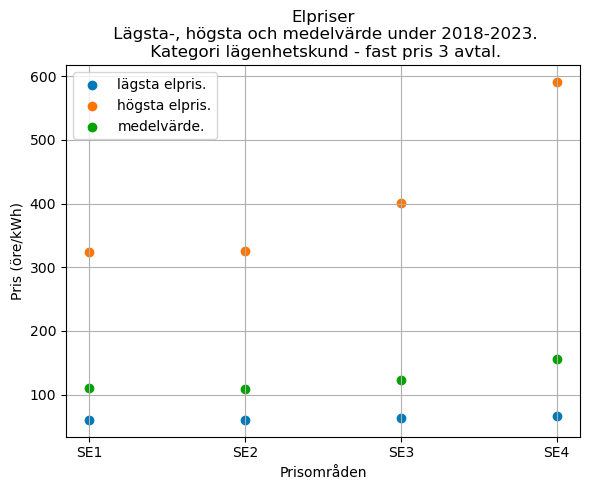

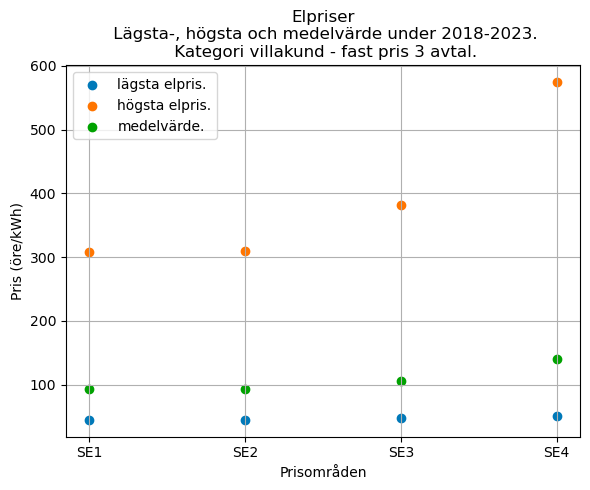

In [8]:
# User input for price agreement
price_agreement = input("Ange prisavtal (R, F1, F3): ").upper()

if price_agreement == "R":
    agreement_name = "rörligt"
elif price_agreement == "F1":
    agreement_name = "fast pris 1"
elif price_agreement == "F3":
    agreement_name = "fast pris 3"

# Read the data from both files and creates variables of each
lgh_data = read_file("lghpriser.csv")
villa_data = read_file("villapriser.csv")

# Calculates statistics for both apartment and villa prices
lgh_prices, lgh_details = calc_price_for_agreement(lgh_data, price_agreement)
villa_prices, villa_details = calc_price_for_agreement(villa_data, price_agreement) # _details has the year, month, and price

# Creating new, empty dictionaries to hold the stats of the 2 files
lgh_stats = {}
villa_stats = {}

# For apartments
for area in lgh_prices:
    prices = lgh_prices[area]
    details = lgh_details[area]
    lgh_stats[area] = calculate_stats_A5(prices, details)

# For villas
for area in villa_prices:
    prices = villa_prices[area]
    details = villa_details[area]
    villa_stats[area] = calculate_stats_A5(prices, details)


# Call the create_table function and create the table
create_table(lgh_stats, villa_stats, agreement_name)


# Create and show plots for apartment and villa prices
create_plots(lgh_stats, "lägenhetskund", agreement_name)
create_plots(villa_stats, "villakund", agreement_name)